In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('D:/NTU/analysis software/data.csv')

## 1.Test I: stationary

In [2]:
#Utilize ADF for temp_min
result = adfuller(df['temp_min'])
print('ADF statistic:', result[0])
print('p-value:', result[1])
print('threshold value:', result[4])
#Utilize ADF for temp_max
result = adfuller(df['temp_max'])
print('ADF statistic:', result[0])
print('p-value:', result[1])
print('threshold value:', result[4])
##Utilize ADF for rainfall
result = adfuller(df['rainfall'])
print('ADF statistic:', result[0])
print('p-value:', result[1])
print('threshold value:', result[4])

ADF statistic: -1.6016688340532976
p-value: 0.48275510603846217
threshold value: {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
ADF statistic: -1.75352340303577
p-value: 0.403767715125088
threshold value: {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
ADF statistic: -10.74825107862713
p-value: 2.706687249417147e-19
threshold value: {'1%': -3.485585145896754, '5%': -2.885738566292665, '10%': -2.5796759080663887}


All p-value is greater than 0.05, so all the null hypothesis cannot be rejected. This suggests that the data is non-stationary and there is non-randomness in the structure

## 2.Test II: trends

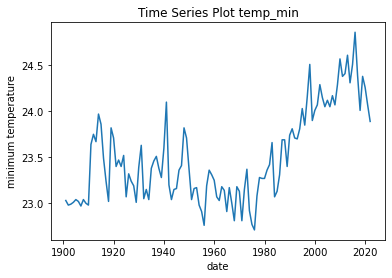

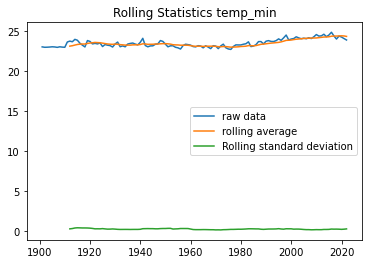

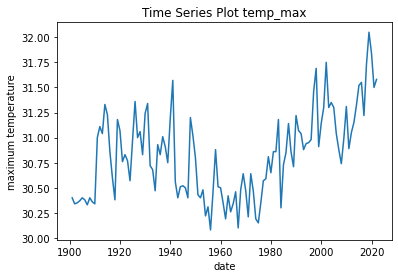

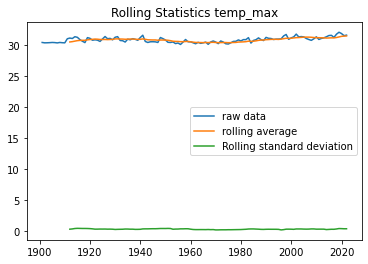

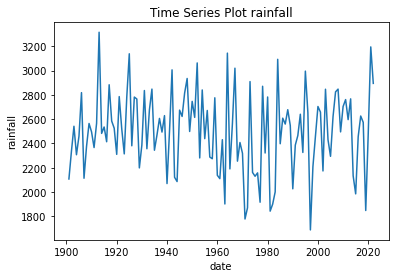

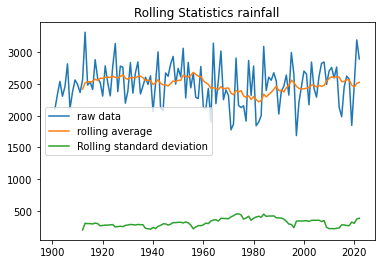

In [3]:
#Look at the data for trends by plotting time series graphs. (temp_min)
plt.plot(df['Category'], df['temp_min'])
plt.title('Time Series Plot temp_min')
plt.xlabel('date')
plt.ylabel('minimum temperature')
plt.show()
rolling_mean1 = df['temp_min'].rolling(window=12).mean()
rolling_std1 = df['temp_min'].rolling(window=12).std()
#Use rolling statistics to detect trends. Calculate the rolling mean and rolling standard deviation and observe if they change over time.
plt.plot(df['Category'], df['temp_min'], label='raw data')
plt.plot(df['Category'], rolling_mean1, label='rolling average')
plt.plot(df['Category'], rolling_std1, label='Rolling standard deviation')
plt.legend()
plt.title('Rolling Statistics temp_min')
plt.show()

#Look at the data for trends by plotting time series graphs. (temp_max)
plt.plot(df['Category'], df['temp_max'])
plt.title('Time Series Plot temp_max')
plt.xlabel('date')
plt.ylabel('maximum temperature')
plt.show()
rolling_mean2 = df['temp_max'].rolling(window=12).mean()
rolling_std2 = df['temp_max'].rolling(window=12).std()
#Use rolling statistics to detect trends. Calculate the rolling mean and rolling standard deviation and observe if they change over time.
plt.plot(df['Category'], df['temp_max'], label='raw data')
plt.plot(df['Category'], rolling_mean2, label='rolling average')
plt.plot(df['Category'], rolling_std2, label='Rolling standard deviation')
plt.legend()
plt.title('Rolling Statistics temp_max')
plt.show()

#Look at the data for trends by plotting time series graphs. (rainfall)
plt.plot(df['Category'], df['rainfall'])
plt.title('Time Series Plot rainfall')
plt.xlabel('date')
plt.ylabel('rainfall')
plt.show()
rolling_mean3 = df['rainfall'].rolling(window=12).mean()
rolling_std3 = df['rainfall'].rolling(window=12).std()
#Use rolling statistics to detect trends. Calculate the rolling mean and rolling standard deviation and observe if they change over time.
plt.plot(df['Category'], df['rainfall'], label='raw data')
plt.plot(df['Category'], rolling_mean3, label='rolling average')
plt.plot(df['Category'], rolling_std3, label='Rolling standard deviation')
plt.legend()
plt.title('Rolling Statistics rainfall')
plt.show()

No clear trend in the data

## 3.Test III: Autocorrelation and seasonality

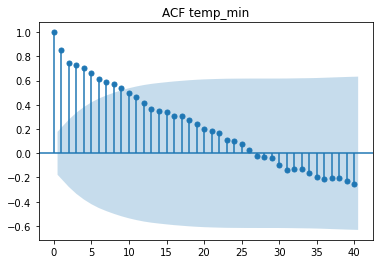

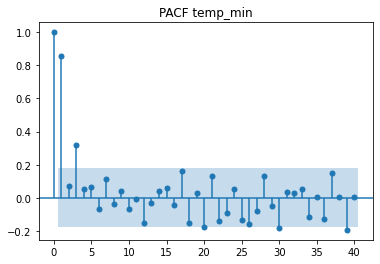

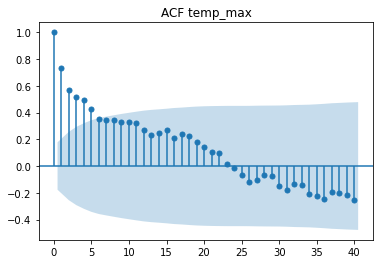

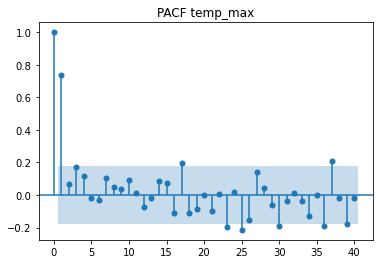

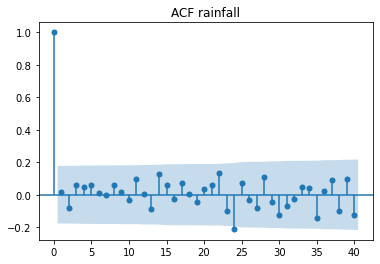

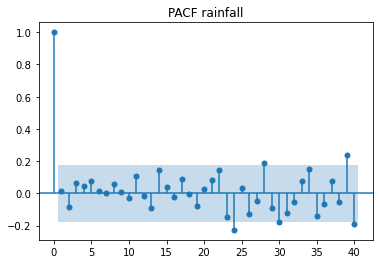

In [5]:
# Generate autocorrelation and partial autocorrelation plots (temp_min)
plot_acf(df['temp_min'], lags=40)
plt.title('ACF temp_min')
plot_pacf(df['temp_min'], lags=40)
plt.title('PACF temp_min')
plt.show()

# Generate autocorrelation and partial autocorrelation plots (temp_max)
plot_acf(df['temp_max'], lags=40)
plt.title('ACF temp_max')
plot_pacf(df['temp_max'], lags=40)
plt.title('PACF temp_max')
plt.show()

# Generate autocorrelation and partial autocorrelation plots (rainfall)
plot_acf(df['rainfall'], lags=40)
plt.title('ACF rainfall')
plot_pacf(df['rainfall'], lags=40)
plt.title('PACF rainfall')
plt.show()

The ACF plot for temp_min has a 9th-order trailing and a 2nd-order truncation of the PACF plot; the ACF plot for temp_max has a 6th-order trailing and a 2nd-order truncation of the PACF plot; and the ACF plot for rainfall has a 1st-order truncation and a 1st-order truncation of the PACF plot.

## 4.Build the model

Since all three variables are non-stationary and annual data, the ARIMA model is used. With the ACF and PACF plots drawn earlier for each variable, it was initially determined that the ARIMA model parameters were:
1. temp_min: p, d, q = 2, 1, 9;
2. temp_max: p, d, q = 2, 1, 6;
3. rainfall: p, d, q = 1, 1, 1.

### 4.1 temp_min ARIMA model

                               SARIMAX Results                                
Dep. Variable:               temp_min   No. Observations:                  122
Model:                 ARIMA(2, 1, 9)   Log Likelihood                   5.393
Date:                Fri, 03 Nov 2023   AIC                             13.215
Time:                        20:17:55   BIC                             46.764
Sample:                             0   HQIC                            26.841
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4455      1.014     -0.440      0.660      -2.432       1.541
ar.L2          0.1749      0.993      0.176      0.860      -1.772       2.121
ma.L1          0.1792      1.021      0.176      0.8

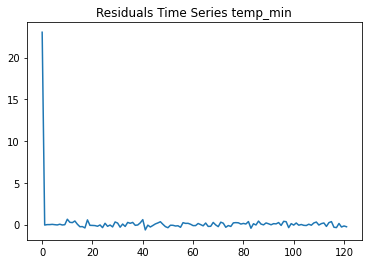

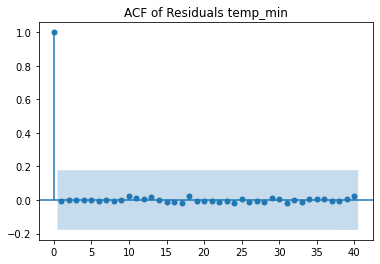

Residuals are stationary.
Fold 1 MSE: 0.07865095141746917
Fold 2 MSE: 0.037300133441938485
Fold 3 MSE: 0.037239320807699976
Fold 4 MSE: 0.056351634309744505
Fold 5 MSE: 0.04351869612556679
Average MSE: 0.05061214722048378
predicted_temp_min 10: 24.081730668372
predicted_temp_min 20: 24.077724069061635
predicted_temp_min 30: 24.077639521282013
predicted_temp_min 40: 24.077637247607512
predicted_temp_min 50: 24.077637186462816
predicted_temp_min 100: 24.077637184773042
predicted_temp_min 200: 24.077637184773042
predicted_temp_min 500: 24.077637184773042


In [6]:
#Build the model
p, d, q = 2, 1, 9  
model = ARIMA(df['temp_min'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())



#Test the model I: analyze residual
resid = model_fit.resid
plt.plot(resid)
plt.title('Residuals Time Series temp_min')
plt.show()

plot_acf(resid, lags=40)
plt.title('ACF of Residuals temp_min')
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(resid)
if result[1] < 0.05:
    print("Residuals are stationary.")
else:
    print("Residuals are not stationary.")
    
    
    
#Test the model II: facilitate 5-fold cross-validation to test its MSE
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
mses = []
endog_column = 'temp_min' 
for train_index, test_index in tscv.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    train_data = train_data[endog_column]
    test_data = test_data[endog_column]
    
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

    mse = mean_squared_error(test_data, predictions)
    mses.append(mse)

for i, mse in enumerate(mses, start=1):
    print(f"Fold {i} MSE: {mse}")

average_mse = np.mean(mses)
print(f"Average MSE: {average_mse}")

# Forecast
years_ahead = [10, 20, 30, 40, 50, 100, 200, 500]
future_years = pd.DataFrame({'Category': np.array(years_ahead) + 2022})
predicted_min_temp = [model_fit.forecast(steps=years) for years in years_ahead]

# Print or use the forecasts as needed
for year, values in zip(years_ahead, predicted_min_temp):
    print(f"predicted_temp_min {year}: {values.iloc[-1]}")

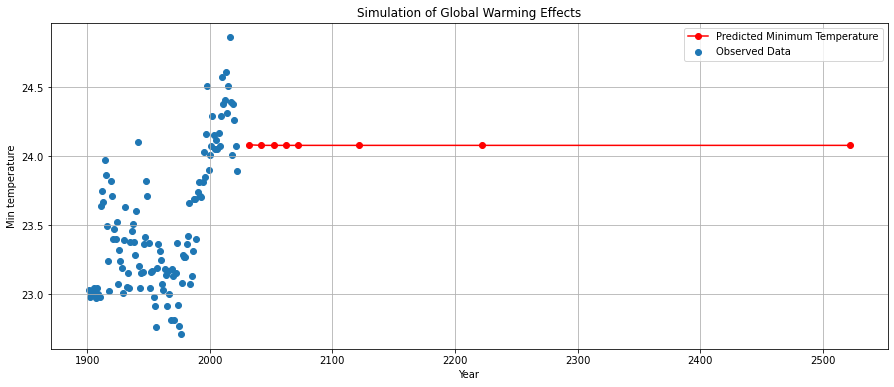

In [7]:
plt.figure(figsize=(15, 6))
predicted_min_temp = [24.081730668372, 24.077724069061635, 24.077639521282013, 
                      24.077637247607512, 24.077637186462816, 24.077637184773042, 
                      24.077637184773042, 24.077637184773042]
plt.scatter(df['Category'], df['temp_min'], label='Observed Data')
plt.plot(future_years['Category'], predicted_min_temp, 'ro-', label='Predicted Minimum Temperature')
plt.xlabel('Year')
plt.ylabel('Min temperature')
plt.title('Simulation of Global Warming Effects')
plt.grid(True)
plt.legend()
plt.show()

As for temp_min, we use ARIMA(2,1,9).

Test I: (analyze residual) Residual plots do not have any obvious patterns or trends, are not autocorrelated, and are stationary.

Test II: (facilitate 5-fold cross-validation to test MSE) Average MSE is 0.05, indicating that the average prediction error of the model is relatively small and the model is reliable.

The forecast results for the next 500 years are shown in the outputs.

### 4.2 temp_max ARIMA model

                               SARIMAX Results                                
Dep. Variable:               temp_max   No. Observations:                  122
Model:                 ARIMA(2, 1, 6)   Log Likelihood                 -10.015
Date:                Fri, 03 Nov 2023   AIC                             38.030
Time:                        20:18:05   BIC                             63.192
Sample:                             0   HQIC                            48.250
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4672      0.096     -4.862      0.000      -0.655      -0.279
ar.L2         -0.8482      0.091     -9.298      0.000      -1.027      -0.669
ma.L1          0.1324      0.133      0.993      0.3

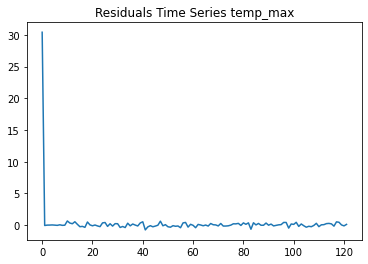

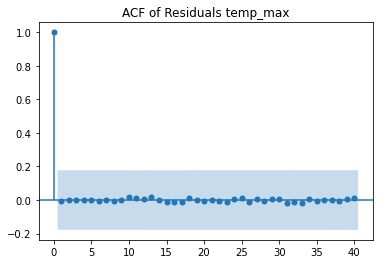

Residuals are stationary.
Fold 1 MSE: 0.10112272534097597
Fold 2 MSE: 0.07838127779291708
Fold 3 MSE: 0.027077565114244383
Fold 4 MSE: 0.08553131094634654
Fold 5 MSE: 0.05570001135444034
Average MSE: 0.06956257810978486
predicted_temp_max 10: 31.55831191796144
predicted_temp_max 20: 31.597807894643033
predicted_temp_max 30: 31.61340429291526
predicted_temp_max 40: 31.617266708621482
predicted_temp_max 50: 31.617102626928894
predicted_temp_max 100: 31.615255493189267
predicted_temp_max 200: 31.61527932086447
predicted_temp_max 500: 31.615279322967204


In [8]:
#Build the model
p, d, q = 2, 1, 6  
model = ARIMA(df['temp_max'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())



#Test the model I: analyze residual
resid = model_fit.resid
plt.plot(resid)
plt.title('Residuals Time Series temp_max')
plt.show()

plot_acf(resid, lags=40)
plt.title('ACF of Residuals temp_max')
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(resid)
if result[1] < 0.05:
    print("Residuals are stationary.")
else:
    print("Residuals are not stationary.")
    
    
    
#Test the model II: facilitate 5-fold cross-validation to test its MSE
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
mses = []
endog_column = 'temp_max' 
for train_index, test_index in tscv.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    train_data = train_data[endog_column]
    test_data = test_data[endog_column]
    
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

    mse = mean_squared_error(test_data, predictions)
    mses.append(mse)

for i, mse in enumerate(mses, start=1):
    print(f"Fold {i} MSE: {mse}")

average_mse = np.mean(mses)
print(f"Average MSE: {average_mse}")


    
# Forecast
years_ahead = [10, 20, 30, 40, 50, 100, 200, 500]
future_years = pd.DataFrame({'Category': np.array(years_ahead) + 2022})
predicted_max_temp = [model_fit.forecast(steps=years) for years in years_ahead]

# Print or use the forecasts as needed
for year, values in zip(years_ahead, predicted_max_temp):
    print(f"predicted_temp_max {year}: {values.iloc[-1]}")

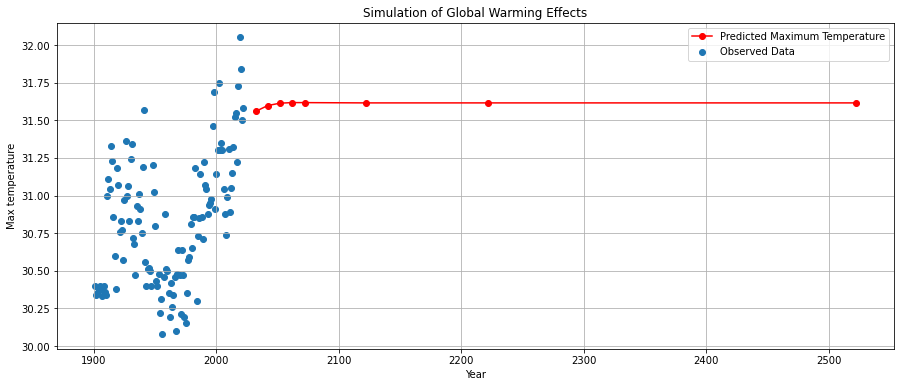

In [9]:
plt.figure(figsize=(15, 6))
predicted_max_temp = [31.55831191796144, 31.597807894643033, 31.61340429291526, 31.617266708621482,
                      31.617102626928894, 31.615255493189267, 31.61527932086447, 31.615279322967204]
plt.scatter(df['Category'], df['temp_max'], label='Observed Data')
plt.plot(future_years['Category'], predicted_max_temp, 'ro-', label='Predicted Maximum Temperature')
plt.xlabel('Year')
plt.ylabel('Max temperature')
plt.title('Simulation of Global Warming Effects')
plt.grid(True)
plt.legend()
plt.show()

As for temp_max, we use ARIMA(2,1,6).

Test I: (analyze residual) Residual plots do not have any obvious patterns or trends, are not autocorrelated, and are stationary.

Test II: (facilitate 5-fold cross-validation to test MSE) Average MSE is 0.07, indicating that the average prediction error of the model is relatively small and the model is reliable.

The forecast results for the next 500 years are shown in the outputs.

### 4.3 rainfall ARIMA model

                               SARIMAX Results                                
Dep. Variable:               rainfall   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -876.068
Date:                Fri, 03 Nov 2023   AIC                           1758.137
Time:                        20:18:16   BIC                           1766.524
Sample:                             0   HQIC                          1761.543
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0322      0.092      0.349      0.727      -0.149       0.213
ma.L1         -0.9993      0.556     -1.798      0.072      -2.089       0.090
sigma2      1.079e+05   5.81e+04      1.857      0.0

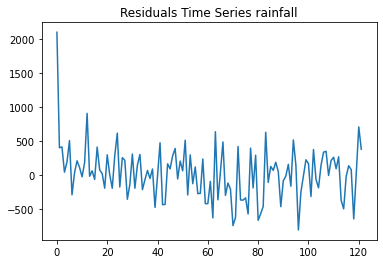

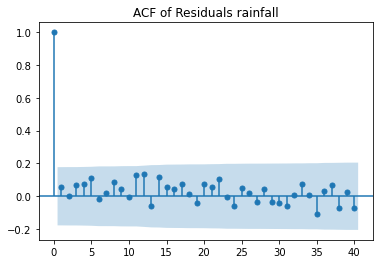

Residuals are stationary.
Fold 1 MSE: 78226.3916361139
Fold 2 MSE: 86712.45293144845
Fold 3 MSE: 210159.9698476914
Fold 4 MSE: 107170.01703340976
Fold 5 MSE: 105935.6900150479
Average MSE: 117640.90429274229
predicted_rainfall 10: 2493.5703539779347
predicted_rainfall 20: 2493.5703539779342
predicted_rainfall 30: 2493.5703539779342
predicted_rainfall 40: 2493.5703539779342
predicted_rainfall 50: 2493.5703539779342
predicted_rainfall 100: 2493.5703539779342
predicted_rainfall 200: 2493.5703539779342
predicted_rainfall 500: 2493.5703539779342


In [10]:
#Build the model
p, d, q = 1, 1, 1  
model = ARIMA(df['rainfall'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())



#Test the model I: analyze residual
resid = model_fit.resid
plt.plot(resid)
plt.title('Residuals Time Series rainfall')
plt.show()

plot_acf(resid, lags=40)
plt.title('ACF of Residuals rainfall')
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(resid)
if result[1] < 0.05:
    print("Residuals are stationary.")
else:
    print("Residuals are not stationary.")
    
    
    
#Test the model II: facilitate 5-fold cross-validation to test its MSE
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
mses = []
endog_column = 'rainfall' 
for train_index, test_index in tscv.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    train_data = train_data[endog_column]
    test_data = test_data[endog_column]
    
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

    mse = mean_squared_error(test_data, predictions)
    mses.append(mse)

for i, mse in enumerate(mses, start=1):
    print(f"Fold {i} MSE: {mse}")

average_mse = np.mean(mses)
print(f"Average MSE: {average_mse}")


    
# Forecast
years_ahead = [10, 20, 30, 40, 50, 100, 200, 500]
future_years = pd.DataFrame({'Category': years_ahead})
predicted_rainfall = [model_fit.forecast(steps=years) for years in years_ahead]

# Print or use the forecasts as needed
for year, values in zip(years_ahead, predicted_rainfall):
    print(f"predicted_rainfall {year}: {values.iloc[-1]}")

In [11]:
import itertools
import statsmodels.api as sm

#Defining parameter ranges
p = d = q = range(1, 5)
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None

#Iterate over parameter combinations
for order in pdq:
    try:
        model = sm.tsa.ARIMA(df['temp_min'], order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

In [12]:
#Print the optimal parameter combination and aic value
print(best_order)
print(best_aic)

(1, 1, 2)
3.1036175866331064


                               SARIMAX Results                                
Dep. Variable:               rainfall   No. Observations:                  122
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -875.729
Date:                Fri, 03 Nov 2023   AIC                           1759.459
Time:                        20:18:58   BIC                           1770.642
Sample:                             0   HQIC                          1764.001
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6665      0.627     -1.063      0.288      -1.896       0.562
ma.L1         -0.2646      0.585     -0.453      0.651      -1.410       0.881
ma.L2         -0.7192      0.578     -1.245      0.2

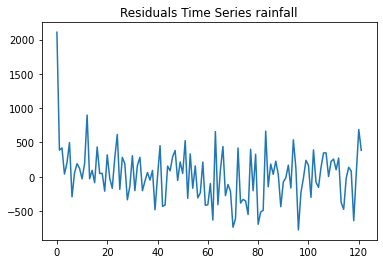

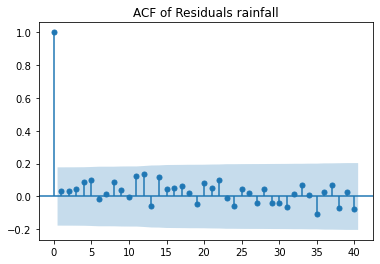

Residuals are stationary.
Fold 1 MSE: 75288.69767756097
Fold 2 MSE: 87885.37842981737
Fold 3 MSE: 208207.6189399373
Fold 4 MSE: 109081.53859409681
Fold 5 MSE: 103563.07338247178
Average MSE: 116805.26140477686
predicted_rainfall 10: 2492.2581706597766
predicted_rainfall 20: 2492.4677132277216
predicted_rainfall 30: 2492.4713406226356
predicted_rainfall 40: 2492.4714034165295
predicted_rainfall 50: 2492.4714045035553
predicted_rainfall 100: 2492.471404522704
predicted_rainfall 200: 2492.471404522704
predicted_rainfall 500: 2492.471404522704


In [13]:
#Modeling, testing and prediction using optimal parameters
#Build the model
p, d, q = 1, 1, 2  
model = ARIMA(df['rainfall'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())



#Test the model I: analyze residual
resid = model_fit.resid
plt.plot(resid)
plt.title('Residuals Time Series rainfall')
plt.show()

plot_acf(resid, lags=40)
plt.title('ACF of Residuals rainfall')
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(resid)
if result[1] < 0.05:
    print("Residuals are stationary.")
else:
    print("Residuals are not stationary.")
    
    
    
#Test the model II: facilitate 5-fold cross-validation to test its MSE
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
mses = []
endog_column = 'rainfall' 
for train_index, test_index in tscv.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    train_data = train_data[endog_column]
    test_data = test_data[endog_column]
    
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

    mse = mean_squared_error(test_data, predictions)
    mses.append(mse)

for i, mse in enumerate(mses, start=1):
    print(f"Fold {i} MSE: {mse}")

average_mse = np.mean(mses)
print(f"Average MSE: {average_mse}")


    
# Forecast
years_ahead = [10, 20, 30, 40, 50, 100, 200, 500]
future_years = pd.DataFrame({'Category': np.array(years_ahead) + 2022})
predicted_rainfall = [model_fit.forecast(steps=years) for years in years_ahead]

# Print or use the forecasts as needed
for year, values in zip(years_ahead, predicted_rainfall):
    print(f"predicted_rainfall {year}: {values.iloc[-1]}")

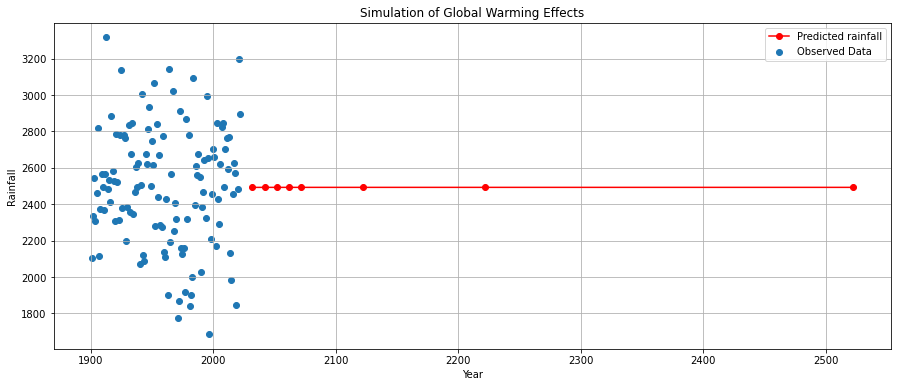

In [14]:
plt.figure(figsize=(15, 6))
predicted_rainfall = [2492.2581706597766, 2492.4677132277216, 2492.4713406226356, 2492.4714034165295,
                      2492.4714045035553, 2492.471404522704, 2492.471404522704, 2492.471404522704]
plt.scatter(df['Category'], df['rainfall'], label='Observed Data')
plt.plot(future_years['Category'], predicted_rainfall, 'ro-', label='Predicted rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('Simulation of Global Warming Effects')
plt.grid(True)
plt.legend()
plt.show()

As for temp_max, we use ARIMA(1,1,2).

Test I: (analyze residual) Residual plots do not have any obvious patterns or trends, are not autocorrelated, and are stationary.

Test II: (facilitate 5-fold cross-validation to test MSE) Average MSE is 116805, indicating that the average prediction error of the model is relatively large and the model is somehow unreliable.

The forecast results for the next 500 years are shown in the outputs.